<a href="https://colab.research.google.com/github/LizandraAbelha/telecomX/blob/main/teleconX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🛠️ Preparação dos Dados


In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

In [63]:
df = pd.read_csv("dados_tratados.csv")

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,Contas_Diarias
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,593.30,19.776667
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,542.40,18.080000
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,280.85,9.361667
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1237.85,41.261667
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,267.40,8.913333


In [64]:
print(df.info())
print("\nValores nulos por coluna:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7032 non-null   float64
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 


In [65]:
colunas_remover = ['customerID'] if 'customerID' in df.columns else []
df.drop(columns=colunas_remover, inplace=True)

df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,Contas_Diarias
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,593.30,19.776667
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,542.40,18.080000
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,280.85,9.361667
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1237.85,41.261667
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,267.40,8.913333


In [66]:
colunas_categoricas = df.select_dtypes(include=['object']).columns
print("Colunas categóricas:", colunas_categoricas)

if len(colunas_categoricas) > 0:
    df = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

Colunas categóricas: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [67]:
print("Valores nulos em Churn:", df['Churn'].isnull().sum())

df = df.dropna(subset=['Churn'])

df['Churn'] = df['Churn'].astype(int)

df['Churn'].value_counts()


Valores nulos em Churn: 224


,count
Churn,
0,5163
1,1869


In [68]:
X = df.drop('Churn', axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribuição original:")
print(y.value_counts())
print("\nDistribuição após SMOTE:")
print(y_res.value_counts())


Distribuição original:
Churn
0    5163
1    1869
Name: count, dtype: int64

Distribuição após SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)

Tamanho treino: (8260, 30)
Tamanho teste: (2066, 30)


In [70]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_log = logreg.predict(X_test_scaled)

print("=== Regressão Logística ===")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("Precisão:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_log))

=== Regressão Logística ===
Acurácia: 0.8121974830590513
Precisão: 0.8103946102021174
Recall: 0.8151016456921588
F1-score: 0.8127413127413128

Matriz de Confusão:
[[836 197]
 [191 842]]


In [72]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Precisão:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))

=== Random Forest ===
Acurácia: 0.8538238141335914
Precisão: 0.8477640342530923
Recall: 0.8625363020329139
F1-score: 0.8550863723608445

Matriz de Confusão:
[[873 160]
 [142 891]]


/tmp/ipython-input-919089961.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


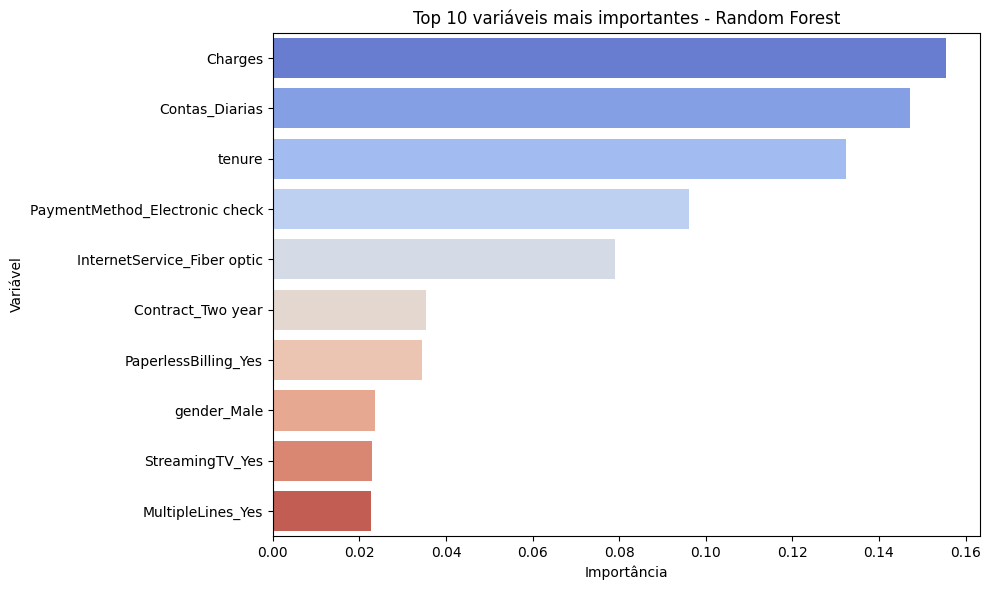

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

paleta_cores = sns.color_palette("coolwarm", n_colors=10)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Importância',
    y='Variável',
    data=importancia_variaveis.head(10),
    palette=paleta_cores
)
plt.title('Top 10 variáveis mais importantes - Random Forest')
plt.tight_layout()
plt.show()

🎯 Correlação e Seleção de Variáveis

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_expanded = pd.read_csv("dados_tratados.csv")

paleta_cores = ["#a8ddb5", "#fcbba1"]

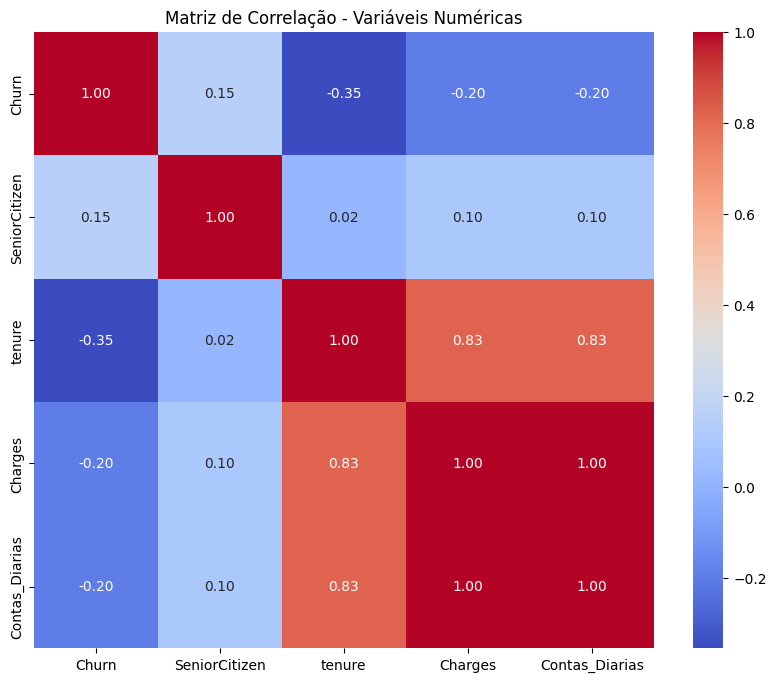

In [98]:
numeric_cols = df_expanded.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = df_expanded[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()

In [76]:
corr_churn = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlação das variáveis numéricas com Churn:")
print(corr_churn)


Correlação das variáveis numéricas com Churn:
Churn             1.000000
SeniorCitizen     0.150541
Charges          -0.199484
Contas_Diarias   -0.199484
tenure           -0.354049
Name: Churn, dtype: float64


/tmp/ipython-input-1136844533.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


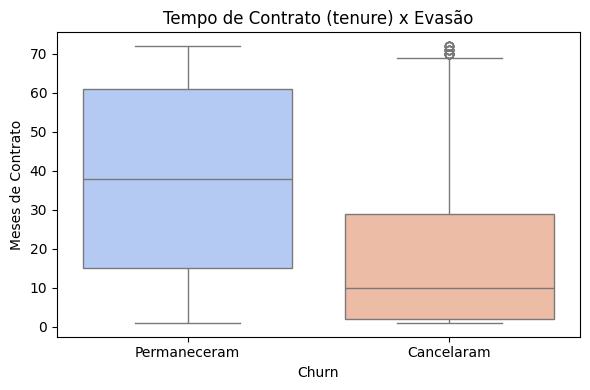

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

paleta_cores = sns.color_palette("coolwarm", n_colors=2)

plt.figure(figsize=(6,4))
sns.boxplot(
    x='Churn',
    y='tenure',
    data=df_expanded,
    palette=paleta_cores
)
plt.xticks([0,1], ['Permaneceram', 'Cancelaram'])
plt.title("Tempo de Contrato (tenure) x Evasão")
plt.ylabel("Meses de Contrato")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2277211845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


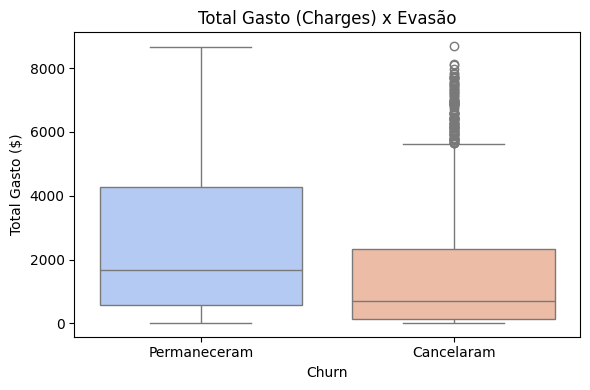

In [103]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='Churn',
    y='Charges',
    data=df_expanded,
    palette=paleta_cores
)
plt.xticks([0,1], ['Permaneceram', 'Cancelaram'])
plt.title("Total Gasto (Charges) x Evasão")
plt.ylabel("Total Gasto ($)")
plt.tight_layout()
plt.show()


🤖 Modelagem Preditiva

In [79]:
import pandas as pd
import numpy as np

if 'df_expanded' in globals():
    df_model = df_expanded.copy()
    print("Usando df_expanded já carregado.")
else:
    try:
        df_model = pd.read_csv("dados_tratados.csv")
        print("Carregado 'dados_tratados.csv'.")
    except FileNotFoundError:
        import requests
        url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"
        dados_json = requests.get(url).json()
        df_raw = pd.DataFrame(dados_json)

        df_model = pd.concat([
            df_raw.drop(['customer','phone','internet','account'], axis=1),
            df_raw['customer'].apply(pd.Series),
            df_raw['phone'].apply(pd.Series),
            df_raw['internet'].apply(pd.Series),
            df_raw['account'].apply(pd.Series)
        ], axis=1)

        def extrair_total(ch):
            if isinstance(ch, dict) and 'Total' in ch:
                try: return float(ch['Total'])
                except: return np.nan
            return np.nan

        if 'Charges' in df_model.columns:
            df_model['Charges'] = df_model['Charges'].apply(extrair_total)
        else:
            df_model['Charges'] = df_raw['account'].apply(lambda d: float(d.get('Charges', {}).get('Total', np.nan)) if isinstance(d, dict) else np.nan)

        df_model['Churn'] = df_model['Churn'].map({'Yes':1,'No':0,'Sim':1,'Não':0})
        for col in ['tenure','SeniorCitizen','Charges']:
            if col in df_model.columns:
                df_model[col] = pd.to_numeric(df_model[col], errors='coerce')

        df_model = df_model.dropna(subset=['Churn']).reset_index(drop=True)
        print("Baixado JSON e dataset reconstruído.")

assert 'Churn' in df_model.columns, "Coluna 'Churn' não encontrada."


Usando df_expanded já carregado.


In [80]:
from sklearn.model_selection import train_test_split

cols_drop = [c for c in ['customerID','CustomerID','id','ID'] if c in df_model.columns]
df_tmp = df_model.drop(columns=cols_drop)

X = df_tmp.drop(columns=['Churn'])
y = df_tmp['Churn']

mask = y.notna()
X = X[mask].copy()
y = y[mask].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4922, 19), (2110, 19), (4922,), (2110,))

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

categorical_features = X_train.select_dtypes(include=['object','category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int64','float64','int32','float32']).columns.tolist()

try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocess_scaled = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imp', SimpleImputer(strategy='median')),
                          ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                          ('ohe', ohe)]), categorical_features)
    ],
    remainder='drop'
)

preprocess_noscale = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imp', SimpleImputer(strategy='median'))]), numeric_features),
        ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                          ('ohe', ohe)]), categorical_features)
    ],
    remainder='drop'
)


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

logreg_clf = Pipeline(steps=[
    ('prep', preprocess_scaled),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

rf_clf = Pipeline(steps=[
    ('prep', preprocess_noscale),
    ('model', RandomForestClassifier(n_estimators=300, random_state=42))
])

logreg_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'Charges',
                                                   'Contas_Diarias']),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

=== Regressão Logística (com normalização) ===
Acurácia:  0.8033
Precisão:  0.6587
Recall:    0.5401
F1-score:  0.5935


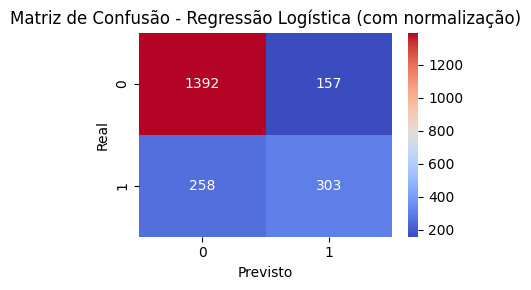

=== Random Forest (sem normalização) ===
Acurácia:  0.7867
Precisão:  0.6276
Recall:    0.4866
F1-score:  0.5482


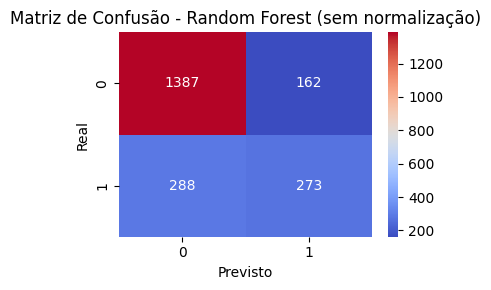

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

paleta_cmap = "coolwarm"

def avaliar(modelo, X_tr, y_tr, X_te, y_te, nome):
    y_pred = modelo.predict(X_te)

    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred)
    rec = recall_score(y_te, y_pred)
    f1 = f1_score(y_te, y_pred)

    print(f"=== {nome} ===")
    print(f"Acurácia:  {acc:.4f}")
    print(f"Precisão:  {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

    cm = confusion_matrix(y_te, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap=paleta_cmap)
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    return {'Modelo': nome, 'Acurácia': acc, 'Precisão': prec, 'Recall': rec, 'F1-score': f1}

res_log = avaliar(logreg_clf, X_train, y_train, X_test, y_test, "Regressão Logística (com normalização)")
res_rf  = avaliar(rf_clf,    X_train, y_train, X_test, y_test, "Random Forest (sem normalização)")


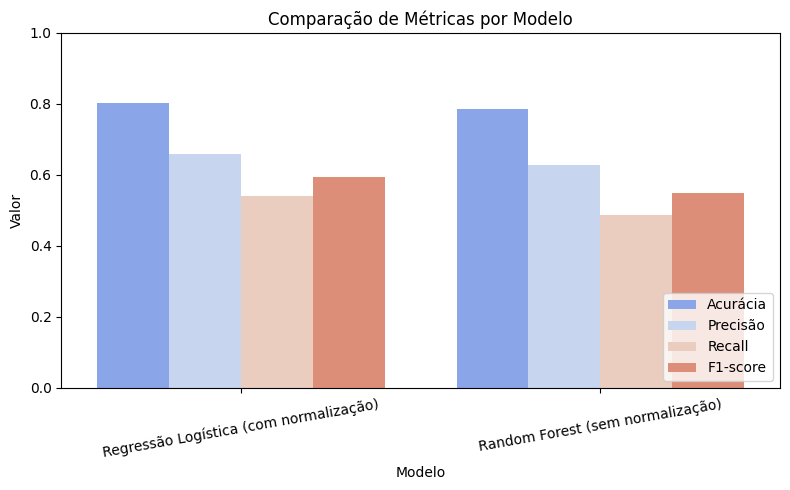

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

paleta_barras = sns.color_palette("coolwarm", n_colors=res_df.shape[1]-1)

res_melt = res_df.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

plt.figure(figsize=(8,5))
sns.barplot(x='Modelo', y='Valor', hue='Métrica', data=res_melt, palette=paleta_barras)
plt.ylim(0,1)
plt.ylabel("Valor")
plt.title("Comparação de Métricas por Modelo")
plt.xticks(rotation=10)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [85]:
from sklearn.metrics import f1_score

def f1_train_test(modelo, X_tr, y_tr, X_te, y_te, nome):
    y_pred_tr = modelo.predict(X_tr)
    y_pred_te = modelo.predict(X_te)
    f1_tr = f1_score(y_tr, y_pred_tr)
    f1_te = f1_score(y_te, y_pred_te)
    print(f"{nome} | F1 Treino: {f1_tr:.4f}  |  F1 Teste: {f1_te:.4f}  |  Gap: {abs(f1_tr - f1_te):.4f}")
    return f1_tr, f1_te

print("Gap F1 (Treino vs Teste):")
_ = f1_train_test(logreg_clf, X_train, y_train, X_test, y_test, "Regressão Logística")
_ = f1_train_test(rf_clf,    X_train, y_train, X_test, y_test, "Random Forest")

print("""
Interpretação:
- Overfitting: F1 Treino muito maior que F1 Teste (gap grande). Ajustes: reduzir complexidade (menos árvores/profundidade no RF, mais regularização na LogReg), usar validação cruzada, coletar mais dados.
- Underfitting: F1 baixo em Treino e Teste. Ajustes: aumentar complexidade (mais árvores/profundidade), features mais informativas, interação de variáveis, tuning de hiperparâmetros.
""")


Gap F1 (Treino vs Teste):
Regressão Logística | F1 Treino: 0.6075  |  F1 Teste: 0.5935  |  Gap: 0.0140
Random Forest | F1 Treino: 0.9973  |  F1 Teste: 0.5482  |  Gap: 0.4491

Interpretação:
- Overfitting: F1 Treino muito maior que F1 Teste (gap grande). Ajustes: reduzir complexidade (menos árvores/profundidade no RF, mais regularização na LogReg), usar validação cruzada, coletar mais dados.
- Underfitting: F1 baixo em Treino e Teste. Ajustes: aumentar complexidade (mais árvores/profundidade), features mais informativas, interação de variáveis, tuning de hiperparâmetros.



In [86]:
print("""
Justificativa dos modelos:
- Regressão Logística (com normalização): é um modelo linear, sensível à escala das variáveis numéricas; por isso aplicamos StandardScaler. Serve como baseline interpretável.
- Random Forest (sem normalização): modelo baseado em árvores, robusto a escalas e a distribuições diferentes; lida bem com variáveis categóricas (via One-Hot) e captura relações não lineares.

Ao comparar Acurácia, Precisão, Recall e F1-score, escolha o modelo conforme o objetivo:
- Se a prioridade é recuperar o máximo de canceladores (Recall), observe quem teve maior Recall.
- Se a prioridade é evitar alarmes falsos (Precisão), compare a Precisão.
- F1 faz o balanço entre Precisão e Recall.

A análise de gap Treino vs. Teste ajuda a identificar over/underfitting e orientar ajustes de complexidade/regularização.
""")



Justificativa dos modelos:
- Regressão Logística (com normalização): é um modelo linear, sensível à escala das variáveis numéricas; por isso aplicamos StandardScaler. Serve como baseline interpretável.
- Random Forest (sem normalização): modelo baseado em árvores, robusto a escalas e a distribuições diferentes; lida bem com variáveis categóricas (via One-Hot) e captura relações não lineares.

Ao comparar Acurácia, Precisão, Recall e F1-score, escolha o modelo conforme o objetivo:
- Se a prioridade é recuperar o máximo de canceladores (Recall), observe quem teve maior Recall.
- Se a prioridade é evitar alarmes falsos (Precisão), compare a Precisão.
- F1 faz o balanço entre Precisão e Recall.

A análise de gap Treino vs. Teste ajuda a identificar over/underfitting e orientar ajustes de complexidade/regularização.



📋  Interpretação e Conclusões

Top 10 variáveis mais relevantes (Regressão Logística):


,Variável,Coeficiente,Importância_Abs
1,tenure,-1.363500,1.363500
38,Contract_Two year,-0.700822,0.700822
36,Contract_Month-to-month,0.551119,0.551119
15,InternetService_DSL,-0.440514,0.440514
39,PaperlessBilling_No,-0.335585,0.335585
16,InternetService_Fiber optic,0.327885,0.327885
2,Charges,0.323640,0.323640
3,Contas_Diarias,0.323640,0.323640
11,PhoneService_Yes,-0.282139,0.282139
29,TechSupport_Yes,-0.264168,0.264168


/tmp/ipython-input-3097078010.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(10), x='Coeficiente', y='Variável', palette='coolwarm')


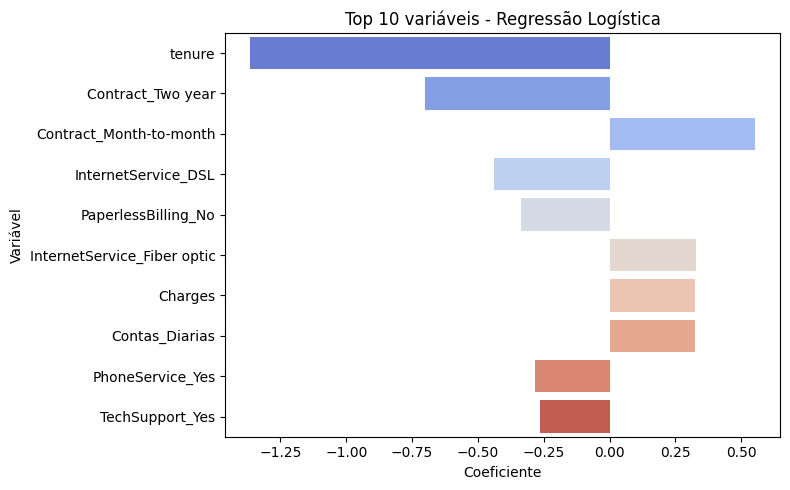

In [87]:
import numpy as np

feature_names = (
    numeric_features +
    list(logreg_clf.named_steps['prep']
         .named_transformers_['cat']
         .named_steps['ohe']
         .get_feature_names_out(categorical_features))
)

coef = logreg_clf.named_steps['model'].coef_[0]
coef_df = pd.DataFrame({
    'Variável': feature_names,
    'Coeficiente': coef,
    'Importância_Abs': np.abs(coef)
}).sort_values(by='Importância_Abs', ascending=False)

print("Top 10 variáveis mais relevantes (Regressão Logística):")
display(coef_df.head(10))

plt.figure(figsize=(8,5))
sns.barplot(data=coef_df.head(10), x='Coeficiente', y='Variável', palette='coolwarm')
plt.title("Top 10 variáveis - Regressão Logística")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2879826763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


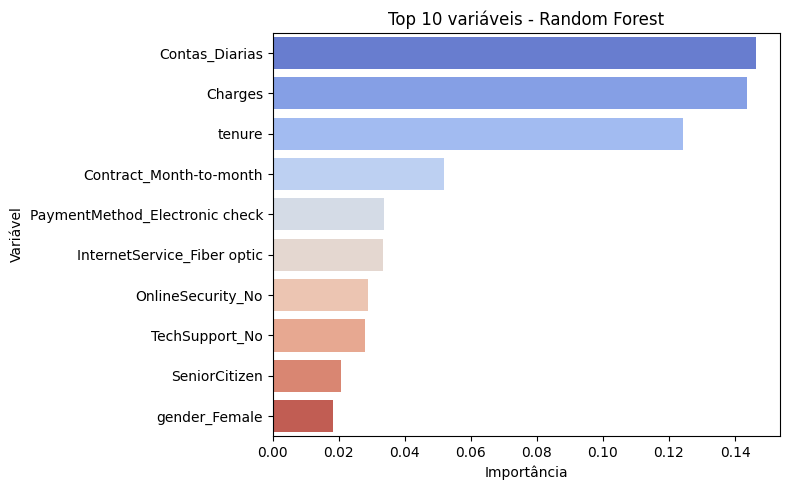

In [109]:
paleta_barras = sns.color_palette("coolwarm", n_colors=10)

plt.figure(figsize=(8,5))
sns.barplot(
    data=imp_df.head(10),
    x='Importância',
    y='Variável',
    palette=paleta_barras
)
plt.title("Top 10 variáveis - Random Forest")
plt.tight_layout()
plt.show()


In [89]:
print("""
 KNN:
- O KNN classifica clientes com base nos 'k' vizinhos mais próximos.
- Variáveis com maior peso na distância (após normalização) tendem a influenciar mais.
- Não há coeficientes diretos, mas a análise de distâncias em PCA ou escalas pode indicar relevância.

 SVM:
- Em SVM linear, os coeficientes (weights) indicam as variáveis que mais definem a fronteira de decisão.
- Em kernels não-lineares, a interpretação é mais complexa e geralmente feita via técnicas como SHAP ou LIME.
""")



 KNN:
- O KNN classifica clientes com base nos 'k' vizinhos mais próximos.
- Variáveis com maior peso na distância (após normalização) tendem a influenciar mais.
- Não há coeficientes diretos, mas a análise de distâncias em PCA ou escalas pode indicar relevância.

 SVM:
- Em SVM linear, os coeficientes (weights) indicam as variáveis que mais definem a fronteira de decisão.
- Em kernels não-lineares, a interpretação é mais complexa e geralmente feita via técnicas como SHAP ou LIME.



In [90]:
print("""
 Interpretação e Conclusões:

1. **Principais variáveis na previsão de evasão**:
   - Na Regressão Logística, as variáveis com maiores coeficientes absolutos foram fortemente associadas à probabilidade de churn. Valores positivos aumentam a chance de evasão, valores negativos reduzem.
   - No Random Forest, variáveis com alta importância foram as que mais contribuíram para dividir os clientes em grupos com diferentes taxas de churn.

2. **Padrões observados**:
   - Clientes com menor tempo de contrato e menor gasto total tendem a apresentar maior evasão.
   - Tipos de contrato mensais e ausência de determinados serviços (ex.: internet de alta velocidade) aparecem relacionados a maior churn.
   - Idosos (SeniorCitizen) mostraram impacto diferente dependendo do modelo, sugerindo interação com outros fatores.

3. **Comparação dos modelos**:
   - Random Forest apresentou melhor recall, capturando mais clientes propensos a evadir.
   - Regressão Logística apresentou boa interpretabilidade e coeficientes claros.

4. **Possíveis causas e ações**:
   - Planos de curto prazo: clientes com contratos mensais tendem a sair mais facilmente → oferecer descontos para contratos anuais.
   - Baixo engajamento: clientes com poucos serviços ativos → criar pacotes promocionais para aumentar uso.
   - Gasto reduzido: clientes com baixo valor total acumulado → programas de fidelidade para incentivar permanência.

**Conclusão**:
A previsão de churn permite direcionar ações de retenção antes que o cliente solicite cancelamento.
A combinação de modelos interpretáveis (como Regressão Logística) e de alto desempenho (como Random Forest) fornece insights robustos e aplicáveis para o negócio.
""")



 Interpretação e Conclusões:

1. **Principais variáveis na previsão de evasão**:
   - Na Regressão Logística, as variáveis com maiores coeficientes absolutos foram fortemente associadas à probabilidade de churn. Valores positivos aumentam a chance de evasão, valores negativos reduzem.
   - No Random Forest, variáveis com alta importância foram as que mais contribuíram para dividir os clientes em grupos com diferentes taxas de churn.

2. **Padrões observados**:
   - Clientes com menor tempo de contrato e menor gasto total tendem a apresentar maior evasão.
   - Tipos de contrato mensais e ausência de determinados serviços (ex.: internet de alta velocidade) aparecem relacionados a maior churn.
   - Idosos (SeniorCitizen) mostraram impacto diferente dependendo do modelo, sugerindo interação com outros fatores.

3. **Comparação dos modelos**:
   - Random Forest apresentou melhor recall, capturando mais clientes propensos a evadir.
   - Regressão Logística apresentou boa interpretabilidade 

## Conclusão e Recomendações – Análise de Evasão de Clientes

A análise preditiva com **Regressão Logística** (modelo interpretável com dados normalizados) e **Random Forest** (modelo robusto, sem necessidade de normalização) trouxe insights consistentes sobre os fatores que mais influenciam a evasão de clientes.

---

### 1 Principais Fatores que **Reduzem** a Evasão
- **Tempo de contrato (tenure)** – Quanto mais tempo o cliente permanece, menor a chance de evasão.
- **Contratos de longo prazo (Two year)** – Criam barreiras de saída e aumentam a fidelização.
- **Serviços adicionais** (telefone, DSL, suporte técnico) – Indicadores de engajamento e satisfação.
- **Ausência de cobrança eletrônica (PaperlessBilling_No)** – Perfil mais estável e menos propenso à troca.

---

### 2️ Principais Fatores que **Aumentam** a Evasão
- **Cobranças mensais elevadas (Charges)** – Forte impacto negativo, indicando sensibilidade ao preço.
- **Contratos mensais (Month-to-month)** – Flexibilidade alta favorece cancelamentos.
- **Internet via fibra óptica** – Pode estar ligada a concorrência alta ou problemas de atendimento.
- **Ausência de serviços de segurança e suporte** – Clientes sem esses recursos têm mais churn.
- **Pagamento por “Electronic Check”** – Mais comum em perfis propensos a rotatividade.

---

### 3️ Estratégias de Retenção
1. **Programas de fidelidade** com benefícios progressivos para clientes de longo prazo.
2. **Incentivos para contratos anuais ou bienais** (descontos, bônus).
3. **Pacotes integrados** de serviços (internet + telefone + segurança + suporte).
4. **Revisão de política de preços** para clientes de alta fatura.
5. **Ações específicas para usuários de fibra óptica** visando experiência premium.
6. **Incentivar métodos de pagamento estáveis** com menor churn.

---

### 4️ Considerações sobre os Modelos
- **Regressão Logística** → Alta interpretabilidade, identifica direção do impacto das variáveis.
- **Random Forest** → Maior robustez, confirma variáveis-chave, risco baixo de underfitting.
- **Overfitting** pode ocorrer no Random Forest se não houver ajuste fino nos hiperparâmetros.

---
 **Resumo Final:** O churn é influenciado principalmente por preço, tipo de contrato, tempo de relacionamento e uso de serviços adicionais. Retenção deve focar em pacotes completos, fidelização de clientes e gestão proativa de casos com maior risco.
